In [9]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/Users/sinha7290/public_html/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
    


In [10]:
import bone
reload(bone)
class MacAnalysis(bone.MacAnalysis):

    def __init__(self):
        bone.MacAnalysis.__init__(self)
#class MacAnalysis(bone.MacAnalysis):


#    def __init__(self):
#        self.db = hu.Database("/Users/sinha7290/public_html/Hegemon/explore.conf")
#        self.normal = []
#        self.uc = []
#        self.cd = []
#        self.ibd = []
#        self.st1 = []
#        self.st2 = []
#        self.st3 = []
#        self.otype = 0
#        self.axes = []
        
#    def addAxes(self, ax):
#        self.axes += [ax]

    def getMitchell2013(self, tn=1):
        self.prepareData("MACV104", "explore.conf")
        time = self.h.getSurvName("c timepoint")
        atype = [re.sub("h.*", "", str(k)) for k in time]
        ahash = {'0':0, '18':3, '12':2, '6':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c infection code")
        atypes = ['C', 'I']
        ahash = {'BatSRBD':1, 'icSARS':1, 'Mock':0, 'dORF6':1, 'H1N1':1, 'mock':0}
        aval = [ahash[i] if i in ahash else None for i in atype]
        if (tn == 2):
            atype = self.h.getSurvName("c infection code")
            ahash = {'BatSRBD':1, 'icSARS':1, 'Mock':0, 'mock':0}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = ['C' if aval[i] == 1 and tval[i] == 0 else atype[i]
                    for i in range(len(atype))]
        if (tn == 3):
            atype = self.h.getSurvName("c infection code")
            ahash = {'H1N1':1, 'Mock':0, 'mock':0}
            aval = [ahash[i] if i in ahash else None for i in atype]
            atype = ['C' if aval[i] == 1 and tval[i] == 0 else atype[i]
                    for i in range(len(atype))]
        self.initData(atype, atypes, ahash)

    def getJones2019(self, tn=1):
        self.prepareData("MACV107", "explore.conf")
        atype = self.h.getSurvName("c visit")
        ahash = {'AV':0, 'CV':1}
        gval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c src1")
        ahash = {'NMS':0, 'PBMC':1}
        rval = [ahash[i] if i in ahash else None for i in atype]
        atype = self.h.getSurvName("c virus positive at av (1=yes, 0=no, 9=not measured)")
        atypes = ['0', '1']
        ahash = {}
        if (tn == 2):
            atype = self.h.getSurvName("c human coronavirus at av (1=yes, 0=no, 9=not measured)")
            atype = [atype[i] if rval[i] == 0 and gval[i] == 0
                    else None for i in range(len(atype))]
        if (tn >= 3):
            atype = self.h.getSurvName("c visit")
            ahash = {'AV':1, 'CV':0}
            atypes = ['CV', 'AV']
        if (tn == 4):
            atype = [atype[i] if rval[i] == 0
                    else None for i in range(len(atype))]
        if (tn == 5):
            atype = [atype[i] if rval[i] == 1
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        
    def getTang2019(self, tn=1):
        self.prepareData("COV167")
        sex = self.h.getSurvName("c Sex")
        ahash = {'f':0, 'm':1}
        sex = [ahash[i] if i in ahash else None for i in sex]
        age = self.h.getSurvName("c age")
        age = [int(age[i]) if i > 1 and age[i] != 'NA'
                else None for i in range(len(age))]
        atype = self.h.getSurvName("c severity")
        atypes = ['C', 'M', 'S']
        ahash = {'flu_mod':1, 'flu_svre':2, 'hlty_ctrl':0}
        if (tn == 2):
            atypes = ['M', 'S']
            ahash = {'flu_mod':0, 'flu_svre':1}
        if (tn == 3):
            atype = [atype[i] if age[i] > 50
                    else None for i in range(len(atype))]
        self.initData(atype, atypes, ahash)
        
    def getJaitovich2020(self, tn=1, tb=0):
        self.prepareDataDf("COV274")
        atype = self.getSurvName('c disease state')
        atypes = ['C', 'CoV']
        ahash = {'COVID-19':1, 'non-COVID-19':0}
        self.initData(atype, atypes, ahash)
        
    def getGow2009(self, tn=1, tb=0):
        self.prepareData("SS2", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['C', 'CFS']
        ahash = {'PBMC, control':0, 'PBMC, CFS':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getByrnes2009(self, tn=1, tb=0):
        self.prepareData("SS3", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c title')
        atypes = ['C_M', 'CFS_M']
        ahash = {'PBLs_pair 227565_unaffected':0,'PBLs_pair 236175_unaffected':0,'PBLs_pair 239142_unaffected':0,'PBLs_pair 247956_unaffected':0, 'PBLs_pair 3384_unaffected':0, 'PBLs_pair 3384_CFS':1,'PBLs_pair 247956_CFS':1,'PBLs_pair 239142_CFS':1,'PBLs_pair 236175_CFS':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getSabath2021(self, tn=1, tb=0):
        self.prepareData("SS1", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c group (ch1)')
        atypes = ['NH', 'H']
        ahash = {'not hospitalized':0, 'hospitalized':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getOvanda2021(self, tn=1, tb=0):
        self.prepareData("SS4", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c disease status (ch1)')
        atypes = ['Severe asthma', 'healthy']
        ahash = {'Severe asthma':0, 'healthy':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getSeverino2014(self, tn=1, tb=0):
        self.prepareData("SS5", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c source_name (ch1)')
        atypes = ['healthy control','septic patient_survivor', 'septic patient_non-survivor']
        ahash = {'healthy control':0,'septic patient_survivor':1, 'septic patient_non-survivor':2}
        self.initData(atype, atypes, ahash)
        return
    
    def getVan20211(self, tn=1, tb=0):
        self.prepareData("SS7", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c condition (ch1)')
        atypes = ['Healthy Control','GWI']
        ahash = {'Healthy Control':0,'GWI':1}
        self.initData(atype, atypes, ahash)
        return
       
    def getBhatta2001(self, tn=1, tb=0):
        self.prepareData("LU5", "/booleanfs2/sahoo/Hegemon/explore.conf")
        atype = self.h.getSurvName('c sample2')
        atypes = ['Normal Lung','Carcinoids']
        ahash = {'Normal Lung':0,'Carcinoids':1}
        self.initData(atype, atypes, ahash)
        return
    
    def getrobles2015(self, tn=1, tb=0):
        self.prepareData("LU11", "/booleanfs2/sahoo/Hegemon/explore.conf")
        atype = self.h.getSurvName('c src1')
        atypes = ['lung, nontumor adjacent', 'lung, adenocarcinoma']
        ahash = {'lung, nontumor adjacent':0,'lung, adenocarcinoma':1}
        self.initData(atype, atypes, ahash)
        return
        
    def getreichmann2021(self, tn=1, tb=0):
        self.prepareData("SS9", "/Users/sinha7290/public_html/Hegemon/explore.conf")
        atype = self.h.getSurvName('c condition (ch1)')
        atypes = ['Control', 'Mtb']
        ahash = {'Control':0,'Mtb':1}
        self.initData(atype, atypes, ahash)
        return

        
def plotViolinBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig

def plotDensityBar(ana, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    ax = ana.densityPlot(ax2, acolor)
    return fig

def processData(ana, l1, wt1, desc=None, violin=1):
    ana.orderData(l1, wt1)
    if (violin == 1):
        return plotViolinBar(ana, desc)
    return plotDensityBar(ana, desc)

def processDataDf(ana, l1, wt1, desc=None):
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 1), (0, 0))
    ax2 = plt.subplot2grid((4, 1), (1, 0), rowspan=3)

    c_dict, fpr, tpr, roc_auc = bone.processGeneGroupsDf(ana, l1, wt1)
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': [], 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getROCAUC()
    ax.text(len(ana.cval[0]), 4, res)
    if desc is not None:
        ax.text(-1, 2, desc, horizontalalignment='right',
                    verticalalignment='center')
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
            'genes': [], 'ax': ax2, 'acolor': acolor, 'vert': 0}
    ax = ana.printViolin(None, params)
    return fig


def getOrder(ana, l1):
    from scipy.stats import fisher_exact, ttest_ind
    res = []
    for s in l1:
        for gn in s:
            id1 = ana.h.getBestID(ana.h.getIDs(gn).keys())
            if id1 is None:
                continue
            e = ana.h.getExprData(id1)
            v1 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[0]])
            v2 = np.array([float(e[i]) if e[i] != "" else 0 for i in ana.state[1]])
            t, p = ttest_ind(v1,v2,equal_var=False)
            res += [[id1, ana.h.getSimpleName(id1),
                   t, p, np.mean(v1)-np.mean(v2)]]
    return pd.DataFrame(res, columns=['ProbeID', 'Name', 'T', 'p', 'Diff'])

def savePList(ofile, ana, l1):
    df = getOrder(ana, l1)
    df1 = df.sort_values(by=['T'], ascending=True)
    bone.saveList(ofile, df1['Name'])

def getSViP():
    l1 = [bone.readList("iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[57]
[14]
[6]
[20]
[8]
[84]
[7]
[2]
[53]
[35]
[11]
[442, 139]
[6, 7]
[1]
[326]
[107]
[972]
[4]
[10]
[11]
[34, 28]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[57]
[14]
[6]
[20]
[8]
[84]
[7]
[2]
[53]
[35]
[11]
[442, 139]
[6, 7]
[1]
[326]
[107]
[972]
[4]
[10]
[11]
[34, 28]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[57]
[14]
[6]
[20]
[8]
[84]
[7]
[2]
[53]
[35]
[11]
[442, 139]
[6, 7]
[1]
[326]
[107]
[972]
[4]
[10]
[11]
[34, 28]
PGhs (n = 18)
pg http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=SS29
6 3 3 0 SS29
[57]
[14]
[6]
[20]
[8]
[84]
[7]
[2]
[53]
[35]
[11]
[442, 139]
[6, 7]
[1]
[326]
[107]
[972]
[4]
[10]
[11]
[34, 28]


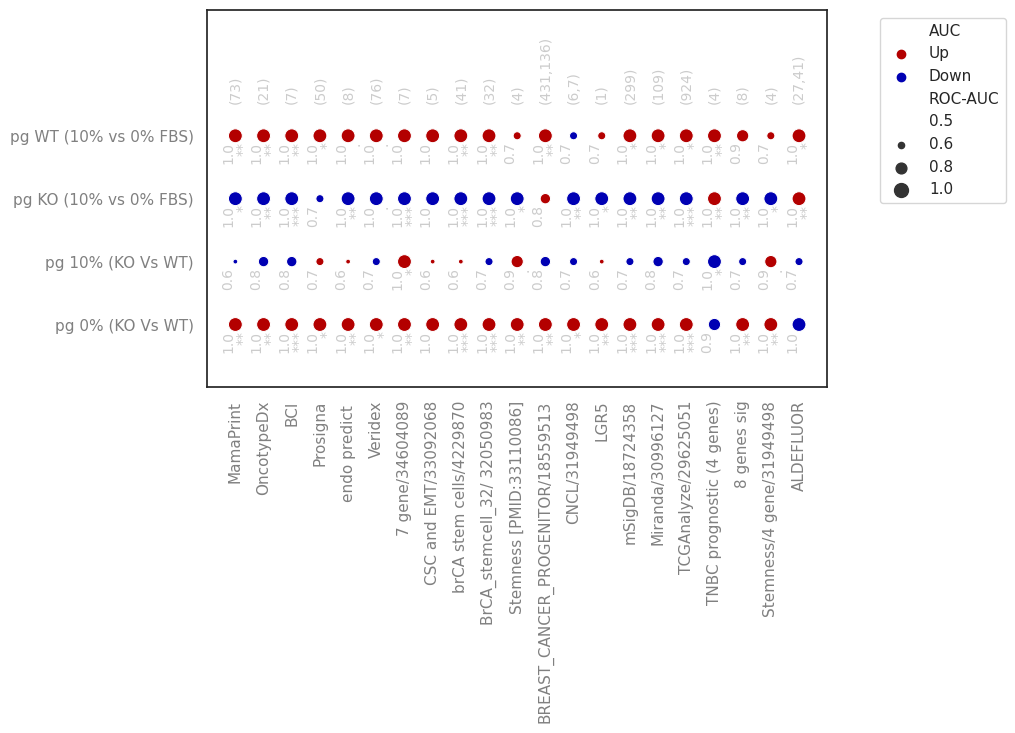

In [12]:
def IPFAnalysis(ana, desc, pdf, id1 = None):
    def getL(l1):
        return '(' + ",".join([str(len(k)) for k in l1]) +')'
    
    res = []
    
#    cfile = 'log5p01.txt'
#    l1 = bone.getEntries(cfile, 0)
#    wt1, l1 = [1, -1], [l1[2:7], l1[9:]]
#    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','GirdinPrint', getL(l1)]
#    res += [ana.getStats(l1, wt1, ann)]  
    
    wt1, l1 = [1], [bone.getEntries("mamaprint.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','MamaPrint', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)] 
 
    
    
    wt1, l1 = [1], [['KI67', 'STK15', 'SURVIVIN', 'CCNB1', 'MYBL2', 'MMP11', 'CTSL2', 'GRB2', 'HER2', 'ER', 'PGR', 'BCL2', 'SCUBE2', 'CD68', 'BAG1', 'GSTM1', 'ACTB', 'GAPDH', 'RPLPO', 'GUS', 'TFRC']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','OncotypeDx', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]    
    
    wt1, l1 = [1], [['HOXB13' ,'IL17BR' ,'BUB1B' ,'CENPA' ,'NEK2' ,'RACGAP1' ,'RRM2']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','BCI', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]    
    
    wt1, l1 = [1], [bone.getEntries("PAM50.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','Prosigna', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)] 

    wt1, l1 = [1], [['AZGP1', 'BIRC5', 'DHCR7', 'IL6ST', 'MGP', 'RBBP8', 'STC2', 'UBE2C']]#endo predict 
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','endo predict ', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]   

    
    wt1, l1 = [1], [bone.getEntries("veridex2.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','Veridex', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]    
    
    
    wt1, l1 = [1], [bone.getEntries("7gene_sig.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','7 gene/34604089', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]      
    
    wt1, l1 = [1], [['ALDH1A1', 'SFRP1', 'miR-139', 'miR-21', 'miR-200c']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','CSC and EMT/33092068', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]    
    
    
    
    wt1, l1 = [1], [bone.getEntries("brCA stem cells.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','brCA stem cells/4229870', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]    
    
    wt1, l1 = [1], [bone.getEntries("BrCA_stemcell_32.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','BrCA_stemcell_32/ 32050983', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]    
    
    wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','Stemness [PMID:33110086]', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]   

    
    cfile = 'BREAST_CANCER_PROGENITOR_sig.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:432], l1[434:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','BREAST_CANCER_PROGENITOR/18559513', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]  
    
    cfile = 'CNCL.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:7], l1[10:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','CNCL/31949498', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]  

    wt1, l1 = [1], [['LGR5']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','LGR5', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
        
    wt1, l1 = [1], [bone.getEntries("mSigDB.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','mSigDB/18724358', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]
               
        
    wt1, l1 = [1], [bone.getEntries("Miranda.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','Miranda/30996127', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]           
        
    wt1, l1 = [1], [bone.getEntries("TCGAnalyze.txt", 0)]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','TCGAnalyze/29625051', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]          
        
        
    wt1, l1 = [1], [['GJA1', 'CD24', 'EPCAM', 'SOX9']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','TNBC prognostic (4 genes)', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]     
    
    wt1, l1 = [1], [['KDM5B', 'CTNNB1', 'NOTCH1', 'HIF1A', 'TWIST1', 'NES', 'EZH2', 'EPAS1', 'BMI1', 'LGR5']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','8 genes sig', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]      

    wt1, l1 = [1], [['PSMB9', 'CXCL13', 'NPR3', 'CDKN2C']]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','Stemness/4 gene/31949498', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]        
    





    
 
    

    
    cfile = 'ALDEFLUOR.txt'
    l1 = bone.getEntries(cfile, 0)
    wt1, l1 = [1, -1], [l1[1:28], l1[30:]]
    ann = [re.sub(" .*", "", ana.h.getSource()),'Hs','ALDEFLUOR', getL(l1)]
    res += [ana.getStats(l1, wt1, ann)]  
    

    
    
    cols = ['GSEID', 'ROC-AUC', 'pvalue', '#Cont', '#Expt',
            'Series', 'Species', 'Signature', '#Genes']
    df = pd.DataFrame(res, columns=cols)
    df['Condition'] = desc
    return df

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['Title'] = 'Plots'
    d['Author'] = 'Daniella Vo'
    d['Subject'] = "Microbe Polyp"
    d['Keywords'] = 'disease training validation ROC'
    d['CreationDate'] = datetime.datetime(2021, 1, 18)
    d['ModDate'] = datetime.datetime.today()
    pdf.close()

def IPFBubble(dfs):
    if len(dfs) <= 0:
        return None
    df1 = dfs[0]
    df1['Name'] = list(df1['Signature'])
    df1['Xl'] = list(df1['#Genes'])
    labels = [k['GSEID'][0] + ' ' + k['Condition'][0] for k in dfs]
    n1 = df1.shape[0]
    rocauc = list(df1['ROC-AUC'])
    p = list(df1['pvalue'])
    y = [1] * n1
    for i in range(1, len(dfs)):
        rocauc += list(dfs[i]['ROC-AUC'])
        p += list(dfs[i]['pvalue'])
        y += [i+1] * n1
    df = pd.DataFrame()
    df['ROC-AUC'] = rocauc
    df['pvalue'] = p
    df['ROC-AUC'] = df['ROC-AUC'].apply(
               lambda x: max([float(k) for k in str(x).split(",")]))
    df['pvalue'] = df['pvalue'].apply(
               lambda x: min([float(k) for k in str(x).split(",")]))
    df['Y'] = y
    df['R'] = df['ROC-AUC'] - 0.5
    df['Ra'] = abs(df['R']) + 0.5
    df['AUC'] = ['Up' if i > 0 else 'Down' for i in df['R']]
    df['code'] = [bone.getCode(i) for i in df['pvalue']]
    df['ROC-AUC'] = df['Ra']
    sns.set()
    sns.set_style("white")
    sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
    sns.set_context("notebook")
    sns.set_palette([bone.adj_light(c, 0.7, 2) for c in ['red', 'blue']])
    x = [i + 1 for i in range(n1)] * len(labels)
    y = df['Y']
    fig, ax = plt.subplots(figsize=(8, len(dfs)*0.5+3), dpi=100)
    ax = sns.scatterplot(x=x, y=y, size="ROC-AUC", hue='AUC',
                         sizes = (0, 100), size_norm = (0.5, 1),
                         hue_order = ['Up', 'Down'], ax=ax, data=df);
    roc = list(df['Ra'])
    code = list(df['code'])
    for line in range(n1):
        ax.text(line + 1, len(labels) + .5, df1['Xl'][line],
                horizontalalignment='center', size='small', color='0.8',
                verticalalignment='bottom', rotation=90)
        for i in range(len(labels)):
            ax.text(line + 1, i + 0.9, "%.1f" % roc[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)
            ax.text(line + 1.5, i + 0.9, code[line + n1 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='top',  rotation=90)

    x1 = [i + 1 for i in range(n1)]
    ax.set_yticks(range(1, len(labels) + 1))
    ax.set_yticklabels(labels)
    ax.set_xlim([0, len(x1)+1])
    ax.set_ylim([0, len(labels) + 2])
    ax.set_xticks(x1)
    ax.set_xticklabels(df1['Name'], rotation=90)
    ax.set_ylabel("")
    ax.grid(False)
    handles, labels = ax.get_legend_handles_labels()
    labels[4] = '0.5'
    ax.legend(handles, labels, bbox_to_anchor=(1.3, 1))

    return df,ax

import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/GP_fig1B.pdf"
pdf = getPDF(cfile)
ana = bone.MacAnalysis()
res = []

#ana.getPGhsWT()
#res += [IPFAnalysis(ana, 'WT (0% vs 10% FBS)', pdf)]

ana.getPGhs0()
res += [IPFAnalysis(ana, '0% (KO Vs WT)', pdf)]

ana.getPGhs10()
res += [IPFAnalysis(ana, '10% (KO Vs WT)', pdf)]

ana.getPGhsKO()
res += [IPFAnalysis(ana, 'KO (10% vs 0% FBS)', pdf)]

ana.getPGhsWT()
res += [IPFAnalysis(ana, 'WT (10% vs 0% FBS)', pdf)]





df,ax = IPFBubble(res)
pdf.savefig(transparent=True,bbox_inches = 'tight')
closePDF(pdf)






